In [1]:
%matplotlib inline
import pandas
import plot

from datetime import date, timedelta

In [6]:
class Monthly_Returns_US_1871:
    def __init__(self, wrap=False, equity_pct=.6):
        self.dataframe = pandas.read_csv('shiller_monthly2.csv')
        self.years_of_data = len(self.dataframe)
        self.equity = equity_pct

    def calculate_rolling_returns(self):
        self.dataframe[["12 month TR"]]
        for row in self.dataframe.iterrows():
            

    def __iter__(self):
        return self.iter_from(1871)
    
    def get_at(self, d):
        year = d.year
        month = d.month

        start = (year * 12) - (1871 * 12)
        start += month - 1
        return self.dataframe.iloc[start]

    def iter_from(self, year, length=None):
        start = (year * 12) - (1871 * 12)
        count = 0
        for row in self.dataframe.iloc[start:].iterrows():
            yield row
            count += 1
            if length != None and count >= length:
                raise StopIteration


The worst months were:
* 1929.11: -26%
* 1932.4 : -23%
* 2008.1 : -20%
* 1932.12: -17%
* 1946.9 : -14%

For each month if the return is positive: skip
If the return is negative:
  Figure out how many months back we need to go before our gains outweigh the drop
  
How do to do that?
  forward = forward_tr + 1
  
  breakeven = forward * (this_month + 1)
  if breakeven < 0:
     month--

In [7]:
m = Monthly_Returns_US_1871()
CHECK = '36 month TR'

results = {}

def previous_month(now):
    last_of_prev = now - timedelta(days=1)
    return last_of_prev.replace(day=1)

def next_month(now):
    (year, month) = divmod(now.month, 12)
    return now.replace(year=now.year+year, month=month+1)

now = date(1900, 1, 1)

def make_key(now):
    # return now
    return int(now.strftime('%Y%m%d'))

while now < date(2016, 1, 1):
    row = m.get_at(now)
    if row[CHECK] < 0:
        tr = row[CHECK] + 1
        count = 0
        current_month = now
        while (tr - 1) < 0:
            count += 1
            current_month = previous_month(current_month)
            prev_tr = m.get_at(current_month)['MoM TR']
            tr *= (prev_tr + 1)
        results[make_key(now)] = count
        #print(now, count)
    else:
        results[make_key(now)] = 0
    
    now = next_month(now)

KeyError: '36 month TR'

19000101    0
19000201    0
19000301    0
19000401    0
19000501    0
Name: Months of Gain Lost, dtype: int64


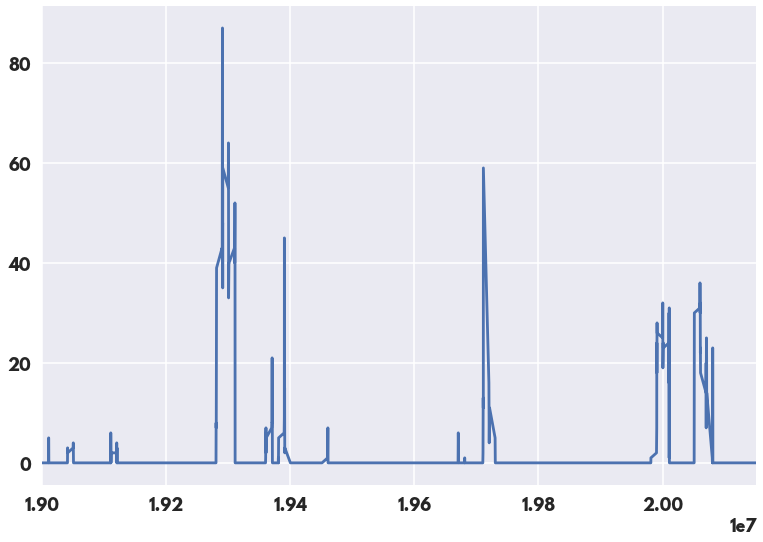

In [4]:
pds = pandas.Series(results, name='Months of Gain Lost')
print(pds.head())
plot.seaborn.tsplot(data=[results[k] for k in sorted(results.keys())],
                   time=[k for k in sorted(results.keys())])

This isn't great. It is telling us how long we needed to be 100% in stocks before the crash to be equal to the 12-month returns after the crash.

In other words, for August 1916 the number is 3. That's telling us that if we were 100% stocks for the 3 months *before* the crash, then those gains equal the losses during the 12 months *during and after the crash*.

This isn't perfect because in the real world you wouldn't move everything to cash -- you'd move to something else that is earning money. And looking at just 12 months isn't necessarily the right thing either, but it at least gives us a starting point.

So what this is really measuring is when going 100% stocks is better than not investing at all. i.e. "As long as you had been 100% stocks for ~60 months before the 2000 crash you technically didn't lose any money

(Actually, rerunning everything with 6 months looks worse.)

What would be better? Compare it to a 50/50 allocation, maybe? How to get monthly bond returns?

In [5]:
d = date(1902, 6, 1)
m.get_at(d)
pds.sort_values(ascending=False)

19290701    87
19290601    85
19290501    65
19300301    64
19300401    63
19300201    63
19291201    59
19711201    59
19300101    55
19290401    53
19310801    52
19310701    52
19290801    51
19310901    49
19291001    48
19310601    47
19290901    47
19310501    45
19390501    45
19310301    43
19290101    43
19310101    43
19310201    42
19290301    42
19290201    41
19301101    40
19310401    40
19301201    40
19300501    39
19281201    39
            ..
19760301     0
19750501     0
19760401     0
19760501     0
19760601     0
19760701     0
19760801     0
19760901     0
19761001     0
19750601     0
19750401     0
19731001     0
19740601     0
19731101     0
19731201     0
19740101     0
19740201     0
19740301     0
19740401     0
19740501     0
19740701     0
19750301     0
19740801     0
19740901     0
19741001     0
19741101     0
19741201     0
19750101     0
19750201     0
19000101     0
Name: Months of Gain Lost, dtype: int64